### Visualizing the Data

##### <br>
-Does Level of Unification have an impact on shutdowns? <br>
 <br>
-Plot of average Presidents' job approval ratings v. during shutdown <br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import datetime
import seaborn as sns

In [3]:
# Load spreadsheet
xl = pd.ExcelFile("../Input/government_shutdown_stats.xlsx")

# Load a sheet into a DataFrame by name:
shutdown_df = xl.parse(xl.sheet_names[0])

In [4]:
# path to file
file_path = '../Input/output.xlsx'

In [5]:
# saving the file into a dataframe
party_df = pd.read_excel(file_path)

In [6]:
# Print head
party_df.head()

,years,president,party_president,house_dem_seats,house_rep_seats,house_other_seats,senate_dem_seats,senate_rep_seats,senate_other_seats,gov_status,term_start,term_end,number_shutdown
0,1975-76,Ford,R,291,144,0,61,38,1,divided,1975,1976,1
1,1977-78,Carter,D,292,143,0,62,38,0,unified,1977,1978,4
2,1979-80,Carter,D,277,158,0,59,41,0,unified,1979,1980,1
3,1981-82,Reagan,R,243,192,0,47,53,0,divided,1981,1982,3
4,1983-84,Reagan,R,269,166,0,46,54,0,divided,1983,1984,3


In [7]:
# count on number of shutdowns 
party_df.number_shutdown.sum()

21

In [8]:
tes_df = party_df.groupby(['party_president','gov_status'])
tes_df.number_shutdown.count()

party_president  gov_status
D                divided        6
                 unified        4
R                divided       10
                 unified        3
Name: number_shutdown, dtype: int64

In [9]:
groupby_status = party_df['gov_status'].groupby(party_df['party_president'])
groupby_status.value_counts()

party_president  gov_status
D                divided        6
                 unified        4
R                divided       10
                 unified        3
Name: gov_status, dtype: int64

In [10]:
# dataframe for our visualization of government unification
viz_df = pd.DataFrame({
    'Democrats':[3,5],
    'Republicans':[11,2]
})

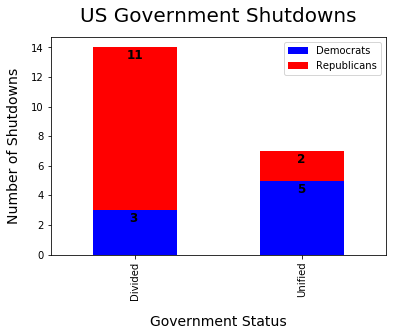

In [11]:
# Create a figure with one axes
fig, ax = plt.subplots()
x_axis = [0,1]
# Plot a stacked bar chart
viz_df.plot.bar(ax=ax, stacked=True,color=['blue','red'])
# Add axes labels using Matplotlib's API
ax.set_xlabel("Government Status", labelpad=15, fontsize=14)

plt.xticks(x_axis, ['Divided','Unified'])
ax.set_ylabel("Number of Shutdowns", labelpad=10, fontsize=14)
ax.set_title("US Government Shutdowns", pad=15, fontsize=20)

ax.annotate(viz_df.Democrats[0], xy=(0,0), xytext=(-0.03, viz_df.Democrats[0]-0.8), fontsize=12, fontweight='semibold')
ax.annotate(viz_df.Republicans[0], xy=(0,0), xytext=(-0.05, viz_df.Republicans[0]+viz_df.Democrats[0]-0.8),
           fontsize=12, fontweight='semibold')
ax.annotate(viz_df.Democrats[1], xy=(0,0), xytext=(0.97, viz_df.Democrats[1]-0.8), fontsize=12, fontweight='semibold')
ax.annotate(viz_df.Republicans[1], xy=(0,0), xytext=(0.97, viz_df.Republicans[1]+viz_df.Democrats[1]-0.8),
           fontsize=12, fontweight='semibold')

plt.savefig("../Figures/USgovUnification.png")

### Approval Rating

#### Loading data and saving it into dataframes

In [44]:
# Loading former presidents' approval ratings 
obama_path = '../Input/obama_approval.xlsx'
bush_path = '../Input/bush_approval.xlsx'
clinton_path = '../Input/clinton_approval.xlsx'
bush_senior_path = '../Input/bush_senior_approval.xlsx'
reagan_path = '../Input/reagan.xlsx'
carter_path = '../Input/carter_approval.xlsx'
ford_path = '../Input/ford_approval.xlsx'
congress_path = '../Input/congress_approval.xlsx'

In [45]:
# Creating the dataframes
obama_df = pd.DataFrame()
bush_df = pd.DataFrame()
clinton_df = pd.DataFrame()
bush_senior_df = pd.DataFrame()
reagan_df = pd.DataFrame()
carter_df = pd.DataFrame()
ford_df = pd.DataFrame()
congress_df = pd.DataFrame()

In [46]:
# saving data into the dataframes
obama_df = pd.read_excel(obama_path)
bush_df = pd.read_excel(bush_path)
clinton_df = pd.read_excel(clinton_path)
bush_senior_df = pd.read_excel(bush_senior_path)
reagan_df = pd.read_excel(reagan_path)
carter_df = pd.read_excel(carter_path)
ford_df = pd.read_excel(ford_path)
congress_df = pd.read_excel(congress_path)

In [14]:
# Print head of bush_df
bush_df.head()

,start_date_bush,end_date_bush,approve_bush,dissaprove_bush,unsure_bush
0,2009-01-09,2009-01-11,34,61,5
1,2008-12-12,2008-12-14,29,67,4
2,2008-12-04,2008-12-07,32,61,7
3,2008-11-13,2008-11-16,29,66,4
4,2008-11-07,2008-11-09,28,68,5


In [15]:
# path 
all_path = '../Input/all_approval.xlsx'

# Dataframe for all presidents's approval ratings 
all_df = pd.read_excel(all_path)

In [17]:
# print head of all_df
all_df[0:3789].head()

,start_date,end_date,approve,disapprove,no_opinion,president
0,2019-01-02,2019-01-10,37,59,4,Trump
1,2018-12-17,2018-12-22,39,55,5,Trump
2,2018-12-10,2018-12-16,38,57,4,Trump
3,2018-12-03,2018-12-09,40,56,4,Trump
4,2018-11-26,2018-12-02,40,56,4,Trump


In [18]:
# Printing last 5 rows 
all_df.tail()

,start_date,end_date,approve,disapprove,no_opinion,president
3813,1974-10-15,1974-10-15,53,28,17,Ford
3814,1974-10-08,1974-10-08,52,28,19,Ford
3815,1974-09-24,1974-09-24,49,28,21,Ford
3816,1974-09-03,1974-09-03,66,12,20,Ford
3817,1974-08-13,1974-08-13,70,3,26,Ford


#### Plotly

In [21]:
plotly.tools.set_credentials_file(username='', api_key='')

In [22]:
trace1 = go.Scatter(
     x = all_df[0:3789].end_date, 
    y = all_df[0:3789].no_opinion, 
    name = "No Opinion/Data", 
    text = all_df[0:3789].no_opinion, 
    yaxis = "y", 
)

trace2 = go.Scatter(
    x = all_df[0:3789].end_date, 
    y = all_df[0:3789].disapprove, 
    name = "Disapprove", 
    text = all_df[0:3789].disapprove, 
    yaxis = "y2", 
)

trace3 = go.Scatter(
    x =all_df[0:3789].end_date, 
    y = all_df[0:3789].approve, 
    name =  "Approve", 
    text =  all_df[0:3789].approve, 
    yaxis = "y3",
)



data = [trace1, trace2, trace3]

# style all the traces
for k in range(len(data)):
    data[k].update(
        {
            "hoverinfo": "name+x+text",
            "line": {"width": 0.5}, 
            "marker": {"size": .5},
            "mode": "lines+markers",
            "showlegend": False
        }
    )

layout = {
  "annotations": [                                     # Annotations start here
    {
      "x": "1974-08-27",  # ford
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.01)", 
      "arrowsize": 0.3, 
      "ax": 20, 
      "ay": -110, 
      "text": "Ford", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
    {                                                   # Carter
      "x": "1977-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(76, 175, 80, 0.01)", 
      "arrowsize": 0.3, 
      "ax": 30,
      "ay": -110,
      "text": "Carter",
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    },
      {                                              # Reagan
      "x": "1981-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.01)", 
      "arrowsize": 0.3, 
      "ax": 60, 
      "ay": -110, 
      "text": "Reagan", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1989-01-20",                            # Bush Senior 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.01)", 
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": -110, 
      "text": "H.W Bush", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {                                           # Clinton
      "x": "1993-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.01)", 
      "arrowsize": 0.5, 
      "ax": 60, 
      "ay": -110, 
      "text": "Clinton", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {                                             # Bush Junior
      "x": "2001-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.01)", 
      "arrowsize": 0.3, 
      "ax": 60, 
      "ay": -110, 
      "text": "Bush", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
       {                                          # Obama
      "x": "2009-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.01)", 
      "arrowsize": 0.3, 
      "ax": 60, 
      "ay": -110, 
      "text": "Obama", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
       {                                       #  Trump
      "x": "2017-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.01)", 
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": -110, 
      "text": "Trump", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1995-12-05", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1976-09-30", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1977-09-30", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1977-10-31", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1977-11-30", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1978-09-30", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      
      {
      "x": "1979-09-30", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1981-11-20", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    },
      
      {
      "x": "1982-09-30", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1982-12-17", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1983-11-10", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1984-09-30", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1984-10-03", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1986-10-16", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1987-12-18", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1990-10-05", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1995-11-13", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "2013-10-01", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "2018-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "2018-02-09", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown 95 annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
  ], 
  "dragmode": "zoom", 
  "hovermode": "x", 
  "legend": {"traceorder": "reversed"}, 
  "margin": {
    "t": 100, 
    "b": 100
  }, 
  "shapes": [
    {
      "fillcolor": "rgba(255, 0, 0, 0.2)",    # Ford shape
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1974-08-13", 
      "x1": "1977-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
       {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1995-12-05", 
      "x1": "1996-01-06", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
    {
      "fillcolor": "rgba(0,0,255,0.2)",          # Carter Shape
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1977-01-20", 
      "x1": "1981-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    },
      {
      "fillcolor": "rgba(255, 0, 0, 0.3)",   # Reagan shape
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1981-01-20", 
      "x1": "1989-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      
  {
      "fillcolor": "rgba(255, 0, 0, 0.2)",  # Bush senior shape
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1989-01-20", 
      "x1": "1993-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      {
      "fillcolor": "rgba(0,0,255,0.2)",     # Clinton shape
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1993-01-20", 
      "x1": "2001-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 

    {
      "fillcolor": "rgba(255, 0, 0, 0.2)",    # Bush shape
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "2001-01-20", 
      "x1": "2009-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
       {
      "fillcolor": "rgba(0, 0, 255, 0.2)",   # obama shape
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "2009-01-20", 
      "x1": "2017-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      {
      "fillcolor": "rgba(255, 0, 0, 0.2)", # Trump shape
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "2017-01-20", 
      "x1": "2020-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
     {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1976-09-30", 
      "x1": "1976-10-11", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
       {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1977-09-30", 
      "x1": "1977-10-13", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    },
         {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1977-10-31", 
      "x1": "1977-11-09", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      
     {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1977-11-30", 
      "x1": "1977-12-09", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
     {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1978-09-30", 
      "x1": "1978-10-18", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
     {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1979-09-30", 
      "x1": "1979-10-12", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
    {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1981-11-20", 
      "x1": "1981-11-23", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
     {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1982-09-30", 
      "x1": "1982-10-02", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
     {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1982-12-17", 
      "x1": "1982-12-21", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
         {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1983-11-10", 
      "x1": "1983-11-14", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      
   {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1984-09-30", 
      "x1": "1984-10-03", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      
      {
      "fillcolor": "rgba(0, 0, 0, 0.4)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1984-10-03", 
      "x1": "1984-10-05", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
     {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1986-10-16", 
      "x1": "1986-10-18", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
     {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1987-12-18", 
      "x1": "1987-12-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
         {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1990-10-05", 
      "x1": "1990-10-09", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
         {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1995-11-13", 
      "x1": "1995-11-19", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
         {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "2013-10-01", 
      "x1": "2013-10-17", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
         {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "2018-01-20", 
      "x1": "2018-01-22", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
         {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown 95' shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "2018-02-09", 
      "x1": "2018-02-09", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      
  ], 
  "xaxis": {
    "autorange": True, 
    "range": ["1975", "2019"], 
    "rangeslider": {
      "autorange": True, 
      "range": ["1975", "2019"]
    }, 
    "type": "date"
  }, 
  "yaxis": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0, 0.2], 
    "linecolor": "#673ab7", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#673ab7"}, 
    "tickmode": "auto", 
    "ticks": "", 
    "titlefont": {"color": "#673ab7"}, 
    "type": "linear", 
    "zeroline": False
  }, 
  "yaxis2": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0.2, 0.4], 
    "linecolor": "#E91E63", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#E91E63"}, 
    "tickmode": "auto", 
    "ticks": "", 
    "titlefont": {"color": "#E91E63"}, 
    "type": "linear", 
    "zeroline": False
  }, 
  "yaxis3": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0.4, 0.6], 
    "linecolor": "#795548", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#795548"}, 
    "tickmode": "auto", 
    "ticks": "", 
    "title": "% Approval", 
    "titlefont": {"color": "#795548"}, 
    "type": "linear", 
    "zeroline": False
  }, 
  "yaxis4": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0.6, 0.8], 
    "linecolor": "#607d8b", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#607d8b"}, 
    "tickmode": "auto", 
    "ticks": "", 
#     "title": "%", 
    "titlefont": {"color": "#607d8b"}, 
    "type": "linear", 
    "zeroline": False
  }, 
  "yaxis5": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0.8, 1], 
    "linecolor": "#2196F3", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#2196F3"}, 
    "tickmode": "auto",
    "ticks": "", 
    "title":  "%", 
    "titlefont": {"color": "#2196F3"}, 
    "type": "linear", 
    "zeroline": False
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Plot 3 & 4

#### Who Won the Showdown

##### Average Presidential/Congress Approval Ratings during shutdowns

In [19]:
# create a dataframe for trump approval ratings from the all_df by selecting date ranges
trump_df = all_df[(all_df['start_date'] > '2017-01-20') & (all_df['end_date'] <= '2019-01-10 04:00:00')]

In [20]:
trump_df.head(1)

,start_date,end_date,approve,disapprove,no_opinion,president
0,2019-01-02,2019-01-10,37,59,4,Trump


In [49]:
# df for congress
congress_clean = pd.DataFrame()
congress_clean = congress_df[['approve_congress','disapprove_congress','sd','ed']]

##### Average approval ratings presidents and congress

In [22]:
# averaging the approval rating of each pandas series and saving into variable
ave_trump = round(trump_df.approve.mean(),2)
ave_obama = round(obama_df.approve_obama.mean(),2)
ave_bush = round(bush_df.approve_bush.mean(),2)
ave_clinton = round(clinton_df.approve_clinton.mean(),2)
ave_bush_senior = round(bush_senior_df.approve_bush_senior.mean(),2)
ave_reagan = round(reagan_df.approve_reagan.mean(),2)
ave_carter = round(carter_df.approve_carter.mean(),2)
ave_ford = round(ford_df.approve_ford.mean(),2)

In [23]:
ave_trump

39.31

In [24]:
# Filtering shutdown periods by president
trump_shutdown1 = trump_df[(trump_df['start_date'] > '2018-01-15') & (trump_df['end_date'] <= '2018-01-29 04:00:00')]
trump_shutdown2 = trump_df[(trump_df['start_date'] > '2018-02-04') & (trump_df['end_date'] <= '2018-02-12 04:00:00')]


obama_shutdown = obama_df[(obama_df['start_date_obama'] > '2013-10-01') & (obama_df['end_date_obama'] <= '2013-10-17 04:00:00')]

clinton_shutdown1 = clinton_df[(clinton_df['start_date_clinton'] > '1995-11-13') & (clinton_df['end_date_clinton'] <= '1995-11-19 04:00:00')]
clinton_shutdown2 = clinton_df[(clinton_df['start_date_clinton'] > '1995-12-05') & (clinton_df['end_date_clinton'] <= '1996-01-06 04:00:00')]

# no data for exact shutdown period, so we chose the closest days after/before shutdown
senior_shutdown = bush_senior_df[(bush_senior_df['start_date_bush_senior'] > '1990-10-09') & (bush_senior_df['end_date_bush_senior'] <= '1990-10-19 04:00:00')]

reagan_shutdown1 = reagan_df[(reagan_df['start_date_reagan'] > '1986-09-30') & (reagan_df['end_date_reagan'] <= '1986-10-30 04:00:00')]
reagan_shutdown2 = reagan_df[(reagan_df['start_date_reagan'] > '1987-12-14') & (reagan_df['end_date_reagan'] <= '1987-12-16 04:00:00')]
reagan_shutdown3 = reagan_df[(reagan_df['start_date_reagan'] > '1981-11-19') & (reagan_df['end_date_reagan'] <= '1981-11-30 04:00:00')]
reagan_shutdown4 = reagan_df[(reagan_df['start_date_reagan'] > '1982-09-30') & (reagan_df['end_date_reagan'] <= '1987-10-02 04:00:00')]
reagan_shutdown5 = reagan_df[(reagan_df['start_date_reagan'] > '1982-12-17') & (reagan_df['end_date_reagan'] <= '1987-12-21 04:00:00')]
reagan_shutdown6 = reagan_df[(reagan_df['start_date_reagan'] > '1983-11-10') & (reagan_df['end_date_reagan'] <= '1987-11-14 04:00:00')]
reagan_shutdown7 = reagan_df[(reagan_df['start_date_reagan'] > '1984-09-30') & (reagan_df['end_date_reagan'] <= '1987-10-03 04:00:00')]
reagan_shutdown8 = reagan_df[(reagan_df['start_date_reagan'] > '1984-10-03') & (reagan_df['end_date_reagan'] <= '1987-10-05 04:00:00')]

carter_shutdown1 = carter_df[(carter_df['start_date_carter'] > '1979-09-30') & (carter_df['end_date_carter'] <= '1979-10-12 04:00:00')]
carter_shutdown2 = carter_df[(carter_df['start_date_carter'] > '1978-10-18') & (carter_df['end_date_carter'] <= '1978-10-25 04:00:00')]
carter_shutdown3 = carter_df[(carter_df['start_date_carter'] > '1977-10-31') & (carter_df['end_date_carter'] <= '1977-11-09 04:00:00')]
carter_shutdown4 = carter_df[(carter_df['start_date_carter'] > '1981-11-20') & (carter_df['end_date_carter'] <= '1981-11-23 04:00:00')] # No further data on carter after 81

# ford_shutdown = ford_df[(ford_df['start_date_ford'] > '1976-09-30') & (ford_df['end_date_ford'] <= '1976-10-11 04:00:00')] No Data

In [25]:
# Getting approval ratings during shutdowns 
ave_trump_shutdown = (trump_shutdown1.approve.mean() +
                      trump_shutdown1.approve.mean() ) /2
                      
ave_obama_shutdown = obama_shutdown.approve_obama.mean()
ave_clinton_shutdown = clinton_shutdown1.approve_clinton.mean()
ave_bush_senior_shutdown = senior_shutdown.approve_bush_senior.mean()
ave_reagan_shutdown = (reagan_shutdown1.approve_reagan.mean() + 
                       reagan_shutdown2.approve_reagan.mean() +
                       reagan_shutdown3.approve_reagan.mean() +
                       reagan_shutdown4.approve_reagan.mean() +
                       reagan_shutdown5.approve_reagan.mean() +
                       reagan_shutdown6.approve_reagan.mean() +
                       reagan_shutdown7.approve_reagan.mean() +
                       reagan_shutdown8.approve_reagan.mean() ) / 8

ave_carter_shutdown = (carter_shutdown1.approve_carter.mean() +
                       carter_shutdown2.approve_carter.mean() +
                       carter_shutdown3.approve_carter.mean()  ) / 3
ave_ford_shutdown = 'No Data'

##### Let's Plot

In [138]:
# Create a dict
raw_data = {'president': ['Ford','Carter','Reagan','Bush Senior','Clinton','Obama','Trump'],
        'ave_approval': [ave_ford,ave_carter,ave_reagan,ave_bush_senior,ave_clinton,ave_obama,ave_trump],
        'ave_approval_shutd': [0,ave_carter_shutdown,ave_reagan_shutdown,ave_bush_senior_shutdown,ave_clinton_shutdown,
                               ave_obama_shutdown,ave_trump_shutdown],
        }

In [139]:
a = ['Ford','Carter','Reagan','Bush Senior','Clinton','Obama','Trump']
b = [ave_ford,ave_carter,ave_reagan,ave_bush_senior,ave_clinton,ave_obama,ave_trump]
c = [0,ave_carter_shutdown,ave_reagan_shutdown,ave_bush_senior,ave_clinton_shutdown,ave_obama_shutdown,ave_trump_shutdown]

In [140]:
print(len(a))
print(len(b))
print(len(c))

7
7
7


In [141]:
# saving the dict into a dataframe
df = pd.DataFrame(raw_data, columns = ['president', 'ave_approval', 'ave_approval_shutd'])

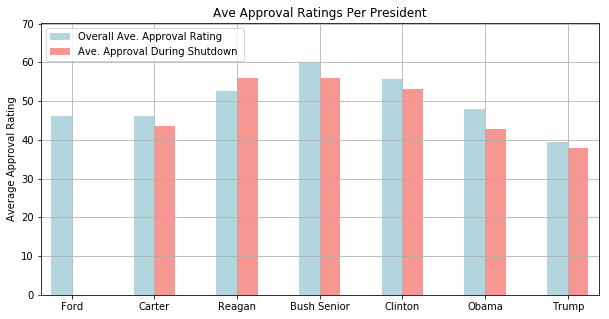

In [160]:
# Setting the positions and width for the bars
pos = list(range(len(df['ave_approval']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with ave_approval data,
# in position pos,
plt.bar(pos, 
        #using df['ave_approval'] data,
        df['ave_approval'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#69ACBF', 
        # with label the first value in president
        label=df['president'][0]) 

# Create a bar with ave_approval_shutd data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['ave_approval_shutd'] data,
        df['ave_approval_shutd'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the second value in president
        label=df['president'][1]) 

# Set the y axis label
ax.set_ylabel('Average Approval Rating')

# Set the chart's title
ax.set_title('Ave Approval Ratings Per President')

# Set the position of the x ticks
ax.set_xticks([p + 0.50 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['president'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.ylim([0, max(df['ave_approval']+ 10)] )

# Adding the legend and showing the plot
plt.legend(['Overall Ave. Approval Rating', 'Ave. Approval During Shutdown '], loc='upper left')
plt.grid()


# saving figure
plt.savefig("../Figures/PresidentsAveApproval.png")

plt.show()

#### Congress

In [143]:
# filtering by congress 
# 3 shutdowns including the current one
congress_115th = congress_clean[(congress_clean['sd'] > '2017-01-03') & (congress_clean['ed'] <= '2019-01-20 04:00:00')]
# no shutdown
congress_114th = congress_clean[(congress_clean['sd'] > '2015-01-03') & (congress_clean['ed'] <= '2017-01-03 04:00:00')]
# 1 shutdown, lasted 16 days 
congress_113th = congress_clean[(congress_clean['sd'] > '2013-01-03') & (congress_clean['ed'] <= '2015-01-03 04:00:00')]
congress_112th = congress_clean[(congress_clean['sd'] > '2011-01-03') & (congress_clean['ed'] <= '2013-01-03 04:00:00')]
# 2 shutdowns 
congress_104th = congress_clean[(congress_clean['sd'] > '1995-01-03') & (congress_clean['ed'] <= '1997-01-03 04:00:00')]
# 1 shutdown
congress_101st = congress_clean[(congress_clean['sd'] > '1989-01-03') & (congress_clean['ed'] <= '1991-01-03 04:00:00')]
# 1 shutdown
congress_100th = congress_clean[(congress_clean['sd'] > '1987-01-03') & (congress_clean['ed'] <= '1989-01-03 04:00:00')]


In [144]:
# Average congress approval ratings
ave_congress_115th = congress_115th.approve_congress.mean()
ave_congress_113th = congress_113th.approve_congress.mean()
ave_congress_104th = congress_104th.approve_congress.mean()
ave_congress_101st = congress_101st.approve_congress.mean()
ave_congress_100th = congress_100th.approve_congress.mean()

In [146]:
# selecting for around shutdown period
congress_115th_shutdown1 = congress_115th[(congress_115th['sd'] > '2018-01-30') & (congress_115th['ed'] <= '2018-02-11 04:00:00')]
congress_113th_shutdown = congress_113th[(congress_113th['sd'] > '2013-10-01') & (congress_113th['ed'] <= '2013-10-17 04:00:00')]
congress_104th_shutdown1 = congress_104th[(congress_104th['sd'] > '1995-12-05') & (congress_104th['ed'] <= '1996-01-06 04:00:00')]
congress_104th_shutdown2 = congress_104th[(congress_104th['sd'] > '1995-11-13') & (congress_104th['ed'] <= '1995-11-19 04:00:00')]
congress_101st_shutdown = congress_101st[(congress_101st['sd'] > '1990-10-05') & (congress_101st['ed'] <= '1990-10-09 04:00:00')]
congress_100th_shutdown = congress_100th[(congress_100th['sd'] > '1987-12-18') & (congress_100th['ed'] <= '1987-12-20 04:00:00')]

In [147]:
# averages per congress during shutdown
ave_115th_shutdown = congress_115th_shutdown1.approve_congress.mean()
ave_113th_shutdown = congress_113th_shutdown.approve_congress.mean()
ave_104th_shutdown = (congress_104th_shutdown1.approve_congress.mean() +
                      congress_104th_shutdown2.approve_congress.mean() ) / 2
ave_101st_shutdown = congress_101st_shutdown.approve_congress.mean()    
ave_100th_shutdown = congress_100th_shutdown.approve_congress.mean()

15.0

#### PLot Congress

In [156]:
# Create a dict
data = {'congress': ['100th (1987-89)','101st (1989-91)',
                     '104th (1995-97)','113th (2013-15)',
                     '115th (2017-19)'],
        'ave_approval': [ave_congress_100th,ave_congress_101st,
                         ave_congress_104th, ave_congress_113th,
                         ave_congress_115th],
        'ave_approval_shutd': [0, 0, 0,
                               ave_113th_shutdown,
                               ave_115th_shutdown,],
        }

In [157]:
# saving the dict into a dataframe
congress_viz = pd.DataFrame(data, columns = ['congress', 'ave_approval', 'ave_approval_shutd'])

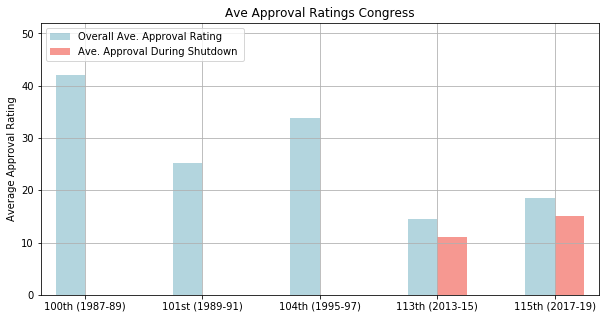

In [159]:
# Setting the positions and width for the bars
pos = list(range(len(congress_viz['ave_approval']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with ave_approval data,
# in position pos,
plt.bar(pos, 
        #using congress_viz['ave_approval'] data,
        congress_viz['ave_approval'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#69ACBF', 
        # with label the first value in congress
        label=congress_viz['congress'][0]) 

# Create a bar with ave_approval_shutd data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using congress_viz['ave_approval_shutd'] data,
        congress_viz['ave_approval_shutd'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the second value in congress
        label=congress_viz['congress'][1]) 

# Set the y axis label
ax.set_ylabel('Average Approval Rating')

# Set the chart's title
ax.set_title('Ave Approval Ratings Congress')

# Set the position of the x ticks
ax.set_xticks([p + 0.50 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(congress_viz['congress'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.ylim([0, max(congress_viz['ave_approval']+ 10)] )

# Adding the legend and showing the plot
plt.legend(['Overall Ave. Approval Rating', 'Ave. Approval During Shutdown '], loc='upper left')
plt.grid()


# saving figure
plt.savefig("../Figures/CongressAveApproval.png")

plt.show()